In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
plt.rcParams.update({'font.size': 32})

In [3]:
# load in data
data5MeV = np.genfromtxt('/scratch/tgh7hx/bdt/bdt_005_6/bdt_6_validation_threetuples.txt',skip_header=1)
preds5MeV = np.genfromtxt('/scratch/tgh7hx/bdt/bdt_005_6/bdt_6_validation_preds.txt', skip_header=1)
data50MeV = np.genfromtxt('/scratch/tgh7hx/bdt/bdt_050_6/bdt_6_validation_threetuples.txt',skip_header=1)
preds50MeV = np.genfromtxt('/scratch/tgh7hx/bdt/bdt_050_6/bdt_6_validation_preds.txt', skip_header=1)

In [6]:
def find_threshold(data):
    for i in range(len(data)):
        if data[i,1] > 0.85:
            threshold = data[i,2]
            break
    return threshold

def find_fpr_tpr(data, threshold):
    for i in range(len(data)):
        disc = data[i,2]
        if disc < threshold:
            fpr = data[i,0]
            tpr = data[i,1]
            break
    return fpr, tpr

In [8]:
thresh5 = find_threshold(data5MeV)
thresh50 = find_threshold(data50MeV)

fpr5, tpr5 = find_fpr_tpr(data5MeV, min([thresh5, thresh50]))
fpr50, tpr50 = find_fpr_tpr(data50MeV, min([thresh5, thresh50]))

print(fpr5, tpr5)
print(fpr50, tpr50)

4.857198367981348e-06 0.9221488209927516
4.857198367981348e-06 0.8507032376202907


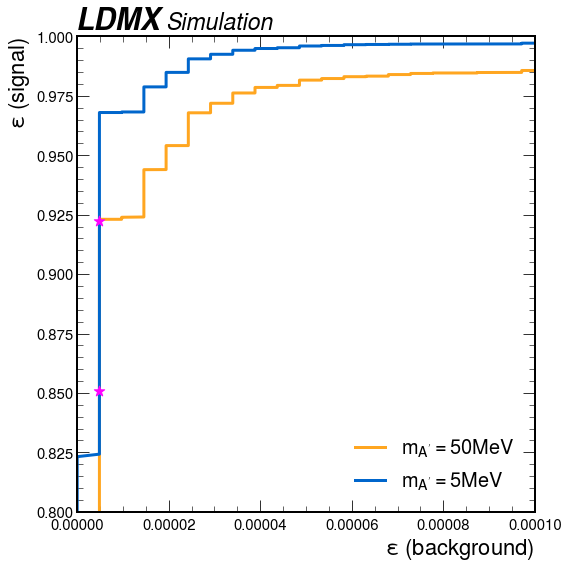

In [9]:
fig, axs = plt.subplots(1,1, figsize=(8,8))
axs.plot(data50MeV[:,0],data50MeV[:,1],c='#ffa620',linewidth=3,label="$m_{A'} = 50 MeV$")
axs.plot(data5MeV[:,0],data5MeV[:,1],c='#0066cc',linewidth=3,label="$m_{A'} = 5 MeV$")
axs.scatter(fpr5,tpr5,c='magenta',marker='*',s=120,zorder=2)
axs.scatter(fpr50,tpr50,c='magenta',marker='*',s=120,zorder=2)
axs.set_xlabel('$\epsilon$ (background)',fontsize=22)
axs.set_ylabel('$\epsilon$ (signal)',fontsize=22)
axs.set_xlim((0,0.0001))
axs.set_ylim((0.8,1))
axs.tick_params(axis='both', which='major',labelsize=15)
axs.legend(fontsize=20)
hep.cms.text(text="Simulation", loc=0, ax=axs,
            **{"exp": "LDMX", "exp_weight": "bold", "fontsize": 23, "italic": (True, True)})
fig.tight_layout()

In [10]:
sig5MeV_pred = []
sig50MeV_pred = []
bkg_pred = []
for pred in preds5MeV:
    if pred[1] == 1:
        sig5MeV_pred.append(pred[0])
    elif pred[1] == 0:
        bkg_pred.append(pred[0])
        
for pred in preds50MeV:
    if pred[1] == 1:
        sig50MeV_pred.append(pred[0])
    elif pred[1] == 0:
        bkg_pred.append(pred[0])

In [11]:
weights5MeV = np.ones_like(sig5MeV_pred) / len(sig5MeV_pred)
weights50MeV = np.ones_like(sig50MeV_pred) / len(sig50MeV_pred)
weightsbkg = np.ones_like(bkg_pred) / len(bkg_pred)

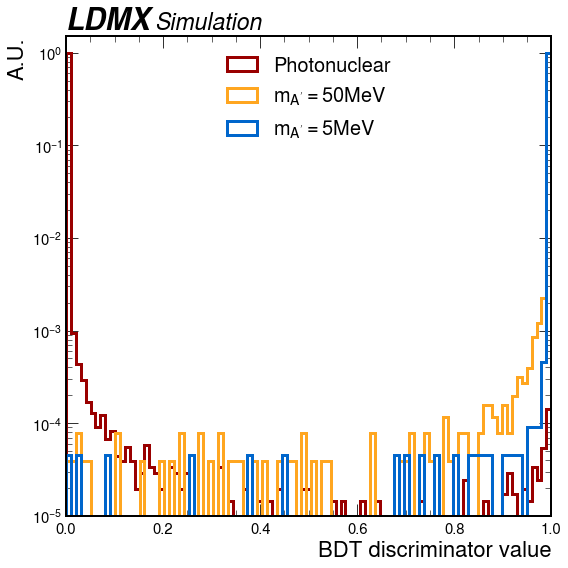

In [12]:
fig, axs = plt.subplots(1,1, figsize=(8,8))
axs.hist(bkg_pred,bins=np.linspace(0,1,num=100),weights=weightsbkg,histtype='step',color='#990000',linewidth=3,label="Photonuclear")
axs.hist(sig50MeV_pred,bins=np.linspace(0,1,num=100),weights=weights50MeV,histtype='step',color='#ffa620',linewidth=3,label="$m_{A'} = 50MeV$")
axs.hist(sig5MeV_pred,bins=np.linspace(0,1,num=100),weights=weights5MeV,histtype='step',color='#0066cc',linewidth=3,label="$m_{A'} = 5MeV$")
axs.set_xlabel('BDT discriminator value',fontsize=22)
axs.set_ylabel('A.U.',fontsize=22)
axs.set_xlim((0,1))
axs.set_ylim((0.00001,1.5))
axs.set_yscale('log')
axs.tick_params(axis='both', which='major',labelsize=15)
axs.legend(fontsize=20, loc='upper center')
hep.cms.text(text="Simulation", loc=0, ax=axs,
            **{"exp": "LDMX", "exp_weight": "bold", "fontsize": 23, "italic": (True, True)})
fig.tight_layout()
